# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the mles to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
def gaussian():
    means = data.groupby(["r"]).mean()
    var = data.groupby(["r"]).var()

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
def priors():
    prior = (data.groupby("r").count() / len(data)).iloc[:,1] 
    classes = np.unique(data["r"].tolist())
     

### Likelihoods + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
def predict(X):
    predictions = []
    for i in X.index: 
        cl = []
        instance = X.loc[i]
        for clas in classes:
            featuress = []
            featuress.append(np.log(prior[clas])) 
            for col in X.columns:
                data = instance[col]
                mean = means[col].loc[clas] 
                variance = var[col].loc[clas] 
                mle = exp(data, mean, variance)
                mle = np.log(mle)  
                featuress.append(mle)
            tot = sum(featuress)
            cl.append(tot)
        #MaxIndex = cl.index(max(cl))
        y_pred = classes[np.argmax(cl)]
        predictions.append(y_pred)
    return predictions

In [5]:
def exp(n, mu, var):
    stdeviation = np.sqrt(var)
    exponent = np.exp(-(np.power(n - mu, 2) / (2 * np.power(stdeviation, 2))))
    pdf = (1 / (np.sqrt(2 * np.pi) * stdeviation)) * exponent
    return pdf

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [6]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')
desc = data.describe()
info = data.info()
prior = (data.groupby("r").count() / len(data)).iloc[:,1] 
classes = np.unique(data["r"].tolist())
means = data.groupby(["r"]).mean()
var = data.groupby(["r"]).var()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ws1     2000 non-null   int64
 1   ws2     2000 non-null   int64
 2   ws3     2000 non-null   int64
 3   ws4     2000 non-null   int64
 4   ws5     2000 non-null   int64
 5   ws6     2000 non-null   int64
 6   ws7     2000 non-null   int64
 7   r       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


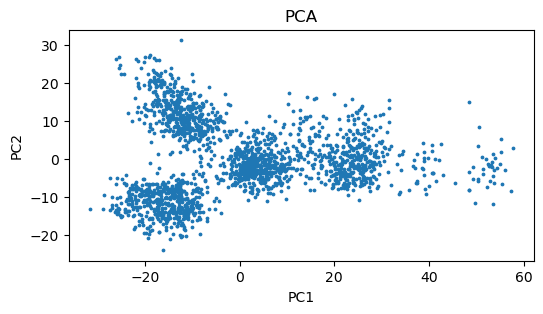

In [7]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
# plot the data
plt.figure(figsize=(6,3))
plt.scatter(data_pca[:,0], data_pca[:,1], s=3)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [8]:
# split the data into training and test set
# separate the data from the target attributes
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [9]:
gaussian()
priors()
classes = np.unique(data["r"].tolist())
y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set: ", accuracy)

Accuracy on training set:  0.981875


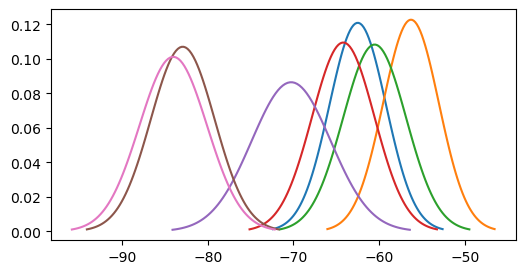

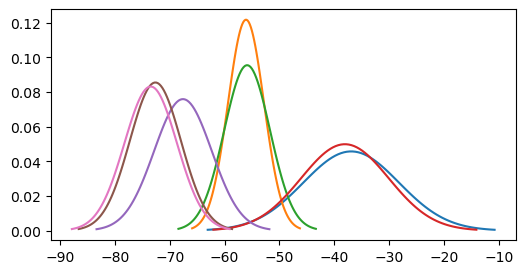

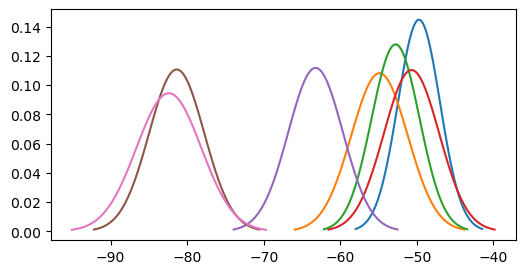

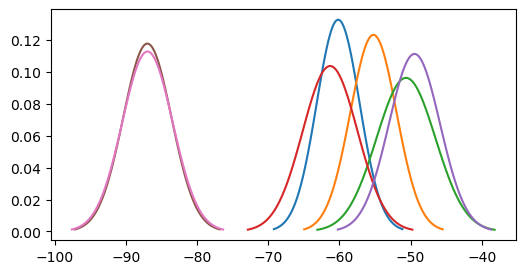

In [10]:
# plot the gaussian distributions for each class
for clas in classes:
    plt.figure(figsize=(6,3))
    for col in x_train.columns:
        mean = means[col].loc[clas]
        variance = var[col].loc[clas]
        stdeviation = np.sqrt(variance)
        x_axis = np.linspace(mean - 3*stdeviation, mean + 3*stdeviation, 100)
        plt.plot(x_axis, exp(x_axis, mean, variance), label = clas)

In [11]:
y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on training set: ", accuracy)

Accuracy on training set:  0.9925


In [12]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified = x_test.iloc[misclassified_indices]
misclassified_labels = y_test.iloc[misclassified_indices]

In [13]:
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws1", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws1", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws1 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws1 is removed: ", accuracy)
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws2", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws2", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws2 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws2 is removed: ", accuracy)
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws3", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws3", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws3 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws3 is removed: ", accuracy)
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws4", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws4", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws4 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws4 is removed: ", accuracy)

train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws5", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws5", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws5 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws5 is removed: ", accuracy)
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws6", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws6", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws6 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws6 is removed: ", accuracy)

train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws7", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws7", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws7 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws7 is removed: ", accuracy)

Accuracy on training set when ws1 is removed:  0.960625
Accuracy on test set when ws1 is removed:  0.975
Accuracy on training set when ws2 is removed:  0.98125
Accuracy on test set when ws2 is removed:  0.99
Accuracy on training set when ws3 is removed:  0.979375
Accuracy on test set when ws3 is removed:  0.99
Accuracy on training set when ws4 is removed:  0.975
Accuracy on test set when ws4 is removed:  0.9825
Accuracy on training set when ws5 is removed:  0.946875
Accuracy on test set when ws5 is removed:  0.95
Accuracy on training set when ws6 is removed:  0.984375
Accuracy on test set when ws6 is removed:  0.995
Accuracy on training set when ws7 is removed:  0.97875
Accuracy on test set when ws7 is removed:  0.99


In [14]:
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws2", axis = 1)
x_train = x_train.drop("ws3", axis = 1)
x_train = x_train.drop("ws6", axis = 1)
x_train = x_train.drop("ws7", axis = 1)
y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws2", axis = 1)
x_test = x_test.drop("ws3", axis = 1)
x_test = x_test.drop("ws6", axis = 1)
x_test = x_test.drop("ws7", axis = 1)
gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws2 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws2 is removed: ", accuracy)

Accuracy on training set when ws2 is removed:  0.9775
Accuracy on test set when ws2 is removed:  0.9825


### Clearly we can see that the removal of the columns ws2, ws3, ws6 and w7 increases or makes the accuracy stay the same. But if we remove all of them together then the accuracy is only slightly worse than if all of the features were there. If we remove ws6 then the accuracy is the highest.

In [15]:

train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws7", axis = 1)
x_train = x_train.drop("ws2", axis = 1)
x_train = x_train.drop("ws3", axis = 1)
x_train = x_train.drop("ws6", axis = 1)
x_train = x_train.drop("ws4", axis = 1)
x_train = x_train.drop("ws5", axis = 1)
y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws7", axis = 1)
x_test = x_test.drop("ws2", axis = 1)
x_test = x_test.drop("ws3", axis = 1)
x_test = x_test.drop("ws6", axis = 1)
x_test = x_test.drop("ws4", axis = 1)
x_test = x_test.drop("ws5", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws7 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws7 is removed: ", accuracy)
train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws1", axis = 1)
x_train = x_train.drop("ws2", axis = 1)
x_train = x_train.drop("ws3", axis = 1)
x_train = x_train.drop("ws6", axis = 1)
x_train = x_train.drop("ws4", axis = 1)
x_train = x_train.drop("ws5", axis = 1)
y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws1", axis = 1)
x_test = x_test.drop("ws2", axis = 1)
x_test = x_test.drop("ws3", axis = 1)
x_test = x_test.drop("ws6", axis = 1)
x_test = x_test.drop("ws4", axis = 1)
x_test = x_test.drop("ws5", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws7 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws7 is removed: ", accuracy)

train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws7", axis = 1)
x_train = x_train.drop("ws1", axis = 1)
x_train = x_train.drop("ws3", axis = 1)
x_train = x_train.drop("ws6", axis = 1)
x_train = x_train.drop("ws4", axis = 1)
x_train = x_train.drop("ws5", axis = 1)
y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws7", axis = 1)
x_test = x_test.drop("ws1", axis = 1)
x_test = x_test.drop("ws3", axis = 1)
x_test = x_test.drop("ws6", axis = 1)
x_test = x_test.drop("ws4", axis = 1)
x_test = x_test.drop("ws5", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws7 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws7 is removed: ", accuracy)

train = data.sample(frac = 0.8, random_state = 1)
test = data.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)
x_train = x_train.drop("ws7", axis = 1)
x_train = x_train.drop("ws2", axis = 1)
x_train = x_train.drop("ws3", axis = 1)
x_train = x_train.drop("ws1", axis = 1)
x_train = x_train.drop("ws4", axis = 1)
x_train = x_train.drop("ws5", axis = 1)
y_test = test["r"]
x_test = test.drop("r", axis = 1)
x_test = x_test.drop("ws7", axis = 1)
x_test = x_test.drop("ws2", axis = 1)
x_test = x_test.drop("ws3", axis = 1)
x_test = x_test.drop("ws1", axis = 1)
x_test = x_test.drop("ws4", axis = 1)
x_test = x_test.drop("ws5", axis = 1)

gaussian()
priors()

y_pred = predict(x_train)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print("Accuracy on training set when ws7 is removed: ", accuracy)

y_pred = predict(x_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on test set when ws7 is removed: ", accuracy)

Accuracy on training set when ws7 is removed:  0.789375
Accuracy on test set when ws7 is removed:  0.7925
Accuracy on training set when ws7 is removed:  0.518125
Accuracy on test set when ws7 is removed:  0.5625
Accuracy on training set when ws7 is removed:  0.291875
Accuracy on test set when ws7 is removed:  0.2875
Accuracy on training set when ws7 is removed:  0.56625
Accuracy on test set when ws7 is removed:  0.6075


### we can see that some features give terrible accuracy but when ws1 is only present we get 78% accuracy on the training dataset

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('wifiLocalization.txt', sep='\t')
train = df.sample(frac = 0.8, random_state = 1)
test = df.drop(train.index)

y_train = train["r"]
x_train = train.drop("r", axis = 1)

y_test = test["r"]
x_test = test.drop("r", axis = 1)

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")


Accuracy: 99.0 %
